# Simple model - evaluation

## LIAR Dataset

In [186]:
def pass_fun(doc):
    return doc

In [187]:
# Load the model
import pickle
tfidf = pickle.load(open("tfidf-2048.pkl", "rb"))
svd = pickle.load(open("svd.pkl", "rb"))
lr = pickle.load(open("lr.pkl", "rb"))

In [188]:
import pandas as pd
df_test = pd.read_csv("data/valid.tsv", sep="\t", header=None)
df_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,12134.json,barely-true,We have less Americans working now than in the...,"economy,jobs",vicky-hartzler,U.S. Representative,Missouri,republican,1,0,1,0,0,an interview with ABC17 News
1,238.json,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,8,5,105,NaN
2,7891.json,false,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,1,1,0,a U.S. Ways and Means hearing
3,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,1,1,0,an opinion article
4,929.json,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,160,163,9,interview with CBS News


In [189]:
# What are the different classses?
df_test[1].unique()

array(['barely-true', 'pants-fire', 'false', 'half-true', 'true',
       'mostly-true'], dtype=object)

In [210]:
""" 
Because we have a binary classifier, we will squish the classes into two categories:
1 - reliable
0 - not reliable
"""
df_test[1] = df_test[1].apply(lambda x: 1 if x=='barely-true' or x=='half-true' or x=='mostly-true' or x=='true' else 0)
df_test[1].value_counts()

1    905
0    379
Name: 1, dtype: int64

In [191]:
# Transform the content column
X_test = svd.transform(tfidf.transform(df_test[2]))

In [192]:
# Make predictions
predictions = lr.predict(X_test)

# Calculate the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(df_test[1], predictions)

0.1308411214953271

### Visualization

In [193]:
# Import the data
import pandas as pd
df_test = pd.read_csv("data/valid.tsv", sep="\t", header=None)
df_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,12134.json,barely-true,We have less Americans working now than in the...,"economy,jobs",vicky-hartzler,U.S. Representative,Missouri,republican,1,0,1,0,0,an interview with ABC17 News
1,238.json,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,8,5,105,NaN
2,7891.json,false,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,1,1,0,a U.S. Ways and Means hearing
3,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,1,1,0,an opinion article
4,929.json,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,160,163,9,interview with CBS News


In [194]:
# Create a dataframe with the % given to reliable and the entry's class and title
predictions = lr.predict_proba(X_test)
predictions = [x[1] for x in predictions]

df = pd.DataFrame({'reliable': predictions, 'class': df_test[1]})
df


,reliable,class
0,0.981217,barely-true
1,0.894554,pants-fire
2,0.975718,false
3,0.960530,half-true
4,0.981974,half-true
...,...,...
1279,0.975226,half-true
1280,0.987057,mostly-true
1281,0.926534,true
1282,0.980779,false


In [195]:
# Sort the dataframe by the % given to reliable
df = df.sort_values(by=['reliable'], ascending=True)
df

,reliable,class
175,0.183892,true
1225,0.534588,half-true
1033,0.594752,half-true
432,0.600031,false
670,0.611176,false
...,...,...
547,0.996818,barely-true
75,0.996839,false
543,0.997073,half-true
387,0.997216,false


In [196]:
# Keep count of how many instances of each class we have seen and accumulate
counts = {
    'true': [],
    'mostly-true': [],
    'half-true': [],
    'barely-true': [],
    'false': [],
    'pants-fire': []
}

def update_counts(dict, class_name):
    # Append the cummulative count + 1 of a class to the list of that class
    dict[class_name].append(len(dict[class_name]) + 1)
    # Append the cummulative count of the rest of the classes to the list of that class
    for key in dict:
        if key != class_name:
            dict[key].append(len(dict[key]))
    return dict


In [197]:
# Loop over the dataframe and update the counts
for index, row in df.iterrows():
    counts = update_counts(counts, row['class'])


# all running totals
counts["total"] = [sum(x) for x in zip(*counts.values())]
counts

{'true': [1,
  1,
  2,
  3,
  4,
  5,
  7,
  7,
  8,
  10,
  10,
  11,
  13,
  13,
  14,
  15,
  16,
  17,
  19,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  32,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  50,
  50,
  51,
  52,
  53,
  54,
  56,
  57,
  57,
  58,
  59,
  60,
  61,
  63,
  63,
  64,
  65,
  66,
  68,
  68,
  70,
  70,
  71,
  72,
  73,
  75,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  86,
  86,
  88,
  88,
  89,
  90,
  91,
  93,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  104,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  116,
  116,
  117,
  119,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  129,
  129,
  130,
  131,
  133,
  133,
  134,
  135,
  136,
  138,
  138,
  139,
  140,
  141,
  143,
  143,
  144,
  145,
  146,
  147,
  148,
  150,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  

In [198]:
# Divide the counts by the total to get the % of each class
for key in counts:
    counts[key] = [x / counts["total"][i] for i, x in enumerate(counts[key])]
counts


{'true': [1.0,
  0.14285714285714285,
  0.15384615384615385,
  0.15789473684210525,
  0.16,
  0.16129032258064516,
  0.1891891891891892,
  0.16279069767441862,
  0.16326530612244897,
  0.18181818181818182,
  0.16393442622950818,
  0.16417910447761194,
  0.1780821917808219,
  0.16455696202531644,
  0.16470588235294117,
  0.16483516483516483,
  0.16494845360824742,
  0.1650485436893204,
  0.1743119266055046,
  0.16521739130434782,
  0.1652892561983471,
  0.16535433070866143,
  0.16541353383458646,
  0.16546762589928057,
  0.16551724137931034,
  0.16556291390728478,
  0.16560509554140126,
  0.1656441717791411,
  0.16568047337278108,
  0.1657142857142857,
  0.16574585635359115,
  0.1711229946524064,
  0.16580310880829016,
  0.1658291457286432,
  0.16585365853658537,
  0.16587677725118483,
  0.16589861751152074,
  0.16591928251121077,
  0.16593886462882096,
  0.16595744680851063,
  0.16597510373443983,
  0.1659919028340081,
  0.16600790513833993,
  0.16602316602316602,
  0.1660377358490566,

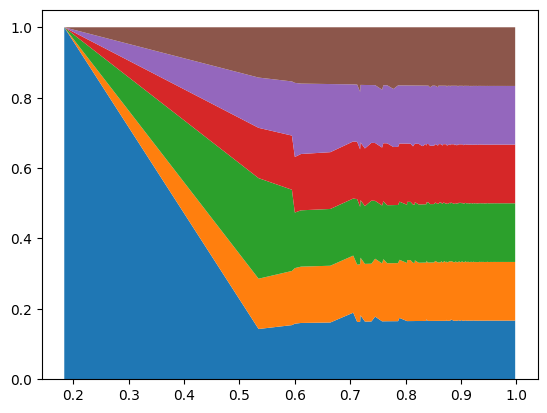

In [199]:
# Plot the results
import matplotlib.pyplot as plt
import numpy as np

# Create a stacked plot of the counts
plt.stackplot(df['reliable'],
                counts['true'],
                counts['mostly-true'],
                counts['half-true'],
                counts['barely-true'],
                counts['false'],
                counts['pants-fire'],
                labels=['true', 'mostly-true', 'half-true', 'barely-true', 'false', 'pants-fire'])

## FakeNewsCorpus

In [200]:
# Load the dataset

In [201]:
# Transform the content column
X_test = svd.transform(tfidf.transform(df_test[2]))

In [202]:
# Make predictions
predictions = lr.predict(X_test)

# Calculate the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(df_test[1], predictions)

0.0

### Visualization

In [203]:
# Import the data
import pandas as pd
df_test = pd.read_csv("data/valid.tsv", sep="\t", header=None)
df_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,12134.json,barely-true,We have less Americans working now than in the...,"economy,jobs",vicky-hartzler,U.S. Representative,Missouri,republican,1,0,1,0,0,an interview with ABC17 News
1,238.json,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,8,5,105,NaN
2,7891.json,false,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,1,1,0,a U.S. Ways and Means hearing
3,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,1,1,0,an opinion article
4,929.json,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,160,163,9,interview with CBS News


In [204]:
# Create a dataframe with the % given to reliable and the entry's class and title
predictions = lr.predict_proba(X_test)
predictions = [x[1] for x in predictions]

df = pd.DataFrame({'reliable': predictions, 'class': df_test[1]})
df


,reliable,class
0,0.981217,barely-true
1,0.894554,pants-fire
2,0.975718,false
3,0.960530,half-true
4,0.981974,half-true
...,...,...
1279,0.975226,half-true
1280,0.987057,mostly-true
1281,0.926534,true
1282,0.980779,false


In [205]:
# Sort the dataframe by the % given to reliable
df = df.sort_values(by=['reliable'], ascending=True)
df

,reliable,class
175,0.183892,true
1225,0.534588,half-true
1033,0.594752,half-true
432,0.600031,false
670,0.611176,false
...,...,...
547,0.996818,barely-true
75,0.996839,false
543,0.997073,half-true
387,0.997216,false


In [206]:
# Keep count of how many instances of each class we have seen and accumulate
counts = {
    'true': [],
    'mostly-true': [],
    'half-true': [],
    'barely-true': [],
    'false': [],
    'pants-fire': []
}

def update_counts(dict, class_name):
    # Append the cummulative count + 1 of a class to the list of that class
    dict[class_name].append(len(dict[class_name]) + 1)
    # Append the cummulative count of the rest of the classes to the list of that class
    for key in dict:
        if key != class_name:
            dict[key].append(len(dict[key]))
    return dict


In [207]:
# Loop over the dataframe and update the counts
for index, row in df.iterrows():
    counts = update_counts(counts, row['class'])


# all running totals
counts["total"] = [sum(x) for x in zip(*counts.values())]
counts

{'true': [1,
  1,
  2,
  3,
  4,
  5,
  7,
  7,
  8,
  10,
  10,
  11,
  13,
  13,
  14,
  15,
  16,
  17,
  19,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  32,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  50,
  50,
  51,
  52,
  53,
  54,
  56,
  57,
  57,
  58,
  59,
  60,
  61,
  63,
  63,
  64,
  65,
  66,
  68,
  68,
  70,
  70,
  71,
  72,
  73,
  75,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  86,
  86,
  88,
  88,
  89,
  90,
  91,
  93,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  104,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  116,
  116,
  117,
  119,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  129,
  129,
  130,
  131,
  133,
  133,
  134,
  135,
  136,
  138,
  138,
  139,
  140,
  141,
  143,
  143,
  144,
  145,
  146,
  147,
  148,
  150,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  

In [208]:
# Divide the counts by the total to get the % of each class
for key in counts:
    counts[key] = [x / counts["total"][i] * (i / len(counts)) for i, x in enumerate(counts[key])]
counts




{'true': [0.0,
  0.02040816326530612,
  0.04395604395604396,
  0.06766917293233082,
  0.09142857142857143,
  0.1152073732718894,
  0.16216216216216217,
  0.16279069767441862,
  0.1865889212827988,
  0.2337662337662338,
  0.23419203747072598,
  0.2579957356076759,
  0.30528375733855184,
  0.30560578661844484,
  0.32941176470588235,
  0.3532182103610675,
  0.37702503681885124,
  0.40083217753120665,
  0.4482306684141547,
  0.4484472049689441,
  0.4722550177095632,
  0.49606299212598426,
  0.5198711063372717,
  0.5436793422404933,
  0.567487684729064,
  0.5912961210974457,
  0.6151046405823476,
  0.6389132340052585,
  0.6627218934911243,
  0.686530612244898,
  0.7103393843725335,
  0.7578304048892284,
  0.7579570688378978,
  0.7817659727207465,
  0.805574912891986,
  0.8293838862559242,
  0.8531928900592496,
  0.8770019218449712,
  0.9008109794135996,
  0.9246200607902735,
  0.948429164196799,
  0.9722382880277617,
  0.9960474308300395,
  1.0198565912851627,
  1.04366576819407,
  1.067474

(0.8, 1.0)

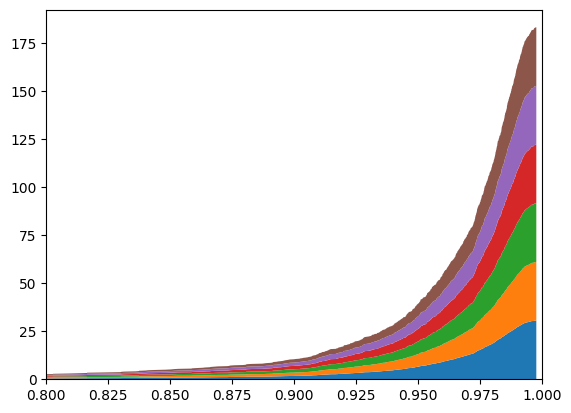

In [209]:
# Plot the results
import matplotlib.pyplot as plt
import numpy as np

# Create a stacked plot of the counts
plt.stackplot(df['reliable'],
                counts['true'],
                counts['mostly-true'],
                counts['half-true'],
                counts['barely-true'],
                counts['false'],
                counts['pants-fire'],
                labels=['true', 'mostly-true', 'half-true', 'barely-true', 'false', 'pants-fire'])
# Start x at 0.4
plt.xlim(0.8, 1)